### Individual Plotting of Spectral Indices

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from pylab import savefig

%matplotlib inline

In [2]:
%run ../lib/spectral_lib.py
%run ../data/raw_data.py

In [3]:
# Load data into separate dataframes.

df1 = pd.DataFrame({'date': date_1,
                   'ndvi': ndvi_1,        # raw ndvi 
                   'ndvic': ndvic_1,      # corrected ndvi
                   'gndvi': gndvi_1,      # gndvi (green ndvi)
                   'ndre' : ndre_1,       # ndre (normative difference red-edge)
                   'psps': psps,          # lbs sugar per section
                   'treatment': treatment # treatment type
                  })
df2 = pd.DataFrame({'date': date_2,
                   'ndvi': ndvi_2, 
                   'ndvic': ndvic_2,
                   'gndvi': gndvi_2,
                   'ndre' : ndre_2,
                   'psps': psps,
                   'treatment': treatment
                  })
df3 = pd.DataFrame({'date': date_3,
                   'ndvi': ndvi_3,
                   'ndvic': ndvic_3,
                   'gndvi': gndvi_3,
                   'ndre' : ndre_3,
                   'psps': psps,
                   'treatment': treatment
                  })
df4 = pd.DataFrame({'date': date_4,
                   'ndvi': ndvi_4,
                   'ndvic': ndvic_4,
                   'gndvi': gndvi_4,
                   'ndre' : ndre_4,
                   'psps': psps,
                   'treatment': treatment
                  })
df5 = pd.DataFrame({'date': date_5,
                   'ndvi': ndvi_5,
                   'ndvic': ndvic_5,
                   'gndvi': gndvi_5,
                   'ndre' : ndre_5,
                   'psps': psps,
                   'treatment': treatment
                  })
df6 = pd.DataFrame({'date': date_6,
                   'ndvi': ndvi_6,
                   'ndvic': ndvic_6,
                   'gndvi': gndvi_6,
                   'ndre' : ndre_6,
                   'psps': psps,
                   'treatment': treatment
                  })

In [4]:
import matplotlib.patches as mpatches # A patch is a 2D 'artist' with a face and edge color.
c = swatch11 # choose color swatch from swatch arrays (loaded from spectral_lib.py).
color_map = {1: c[0], 2: c[1], 3: c[2], 4: c[3], 5: c[4]}

one   = mpatches.Patch(color=c[0], label='0 lbs N')
two   = mpatches.Patch(color=c[1], label='40 lbs N')
three = mpatches.Patch(color=c[2], label='80 lbs N')
four  = mpatches.Patch(color=c[3], label='120 lbs N')
five  = mpatches.Patch(color=c[4], label='180 lbs N')

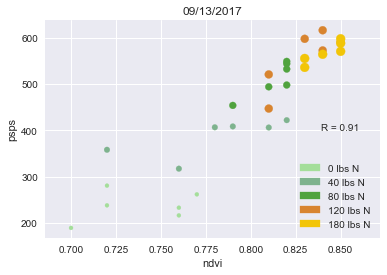

In [5]:
colors = df5.treatment.map(color_map)
p = df5.plot(kind='scatter', 
            x='ndvi', y='psps', 
            s=df5.treatment*16, 
            c=colors, title=date_5)
p.legend(handles=[one,two,three,four,five], loc=4)
p.annotate('R = {0:.2f}'.format(df5['ndvi'].corr(df5['psps'])), xy=(0.839, 400))

plt.savefig('../readme_resources/img/animated/ndvi-5.png', dpi=200)

In [6]:
# Calulate standard Pearson correlation coefficients.
df_dict = {}
df_range = [df1, df2, df3, df4, df5, df6]

# Create a dictionary, keyed by date, with correlation values for each index.
for df in df_range:
    df_dict[df['date'][0]] = [df['ndvi'].corr(df['psps']), \
                              df['ndvic'].corr(df['psps']), \
                              df['gndvi'].corr(df['psps']), \
                              df['ndre'].corr(df['psps']), \
                             ] 
for date, correlation_values in df_dict.items():
    print (date, correlation_values) 

09/13/2017 [0.91222805693076481, 0.57455923233855033, 0.83974185049372108, 0.77241839909586341]
11/13/2017 [0.70328625399204336, 0.69364894287340817, 0.69458905425589323, 0.68907167263810276]
07/28/2017 [0.96855899676231094, 0.90819677279990907, 0.92865925887940515, 0.92162919743064342]
05/10/2017 [0.76569838824691216, 0.81103406532041267, 0.79354907866965263, 0.90093779509313998]
05/25/2017 [0.93259046022271652, 0.92593772158221399, 0.92002760375341475, 0.79627909516805395]
04/25/2017 [0.38544504733529111, 0.40932454146286779, 0.55111542163706229, 0.28728841071771916]


In [7]:
xl = pd.ExcelFile("../data/spectral_index_correlations.xlsx")

In [8]:
print(xl.sheet_names)
df_corr = xl.parse("Sheet1")

['Sheet1', 'Sheet2']


In [9]:
df_corr.head()

,2017-04-25 00:00:00,2017-05-10 00:00:00,2017-05-25 00:00:00,2017-07-28 00:00:00,2017-09-13 00:00:00,2017-11-13 00:00:00
ndvi,0.385445,0.765698,0.932590,0.968559,0.912228,0.703286
ndvic,0.409325,0.811034,0.925938,0.908197,0.574559,0.693649
gndvi,0.551115,0.793549,0.920028,0.928659,0.839742,0.694589
ndre,0.287288,0.900938,0.796279,0.921629,0.772418,0.689072


In [10]:
df_corr2 = xl.parse("Sheet2")

In [11]:
df_corr2

,date,ndvi,ndvic,gndvi,ndre
0,2017-04-25,0.385445,0.409325,0.551115,0.287288
1,2017-05-10,0.765698,0.811034,0.793549,0.900938
2,2017-05-25,0.932590,0.925938,0.920028,0.796279
3,2017-07-28,0.968559,0.908197,0.928659,0.921629
4,2017-09-13,0.912228,0.574559,0.839742,0.772418
5,2017-11-13,0.703286,0.693649,0.694589,0.689072


In [12]:
import matplotlib.pylab as plt
plt.style.use('seaborn-darkgrid')

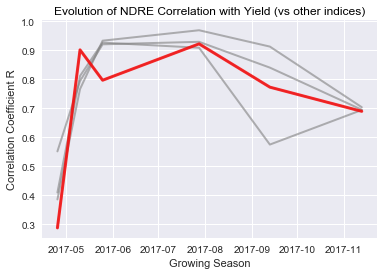

In [17]:
for column in df_corr2.drop('date', axis=1):
   plt.plot(df_corr2['date'], df_corr2[column], marker='', color='grey', linewidth=2, alpha=0.6)
plt.plot(df_corr2['date'], df_corr2['ndre'], marker='', color='red', linewidth=3, alpha=0.8)

plt.title("Evolution of NDRE Correlation with Yield (vs other indices)", fontsize=12, fontweight=0, color='black')
plt.xlabel("Growing Season")
plt.ylabel("Correlation Coefficient R")
#plt.legend()
#plt.savefig('../readme_resources/img/ndre/ndre_correlation.png', dpi=100)

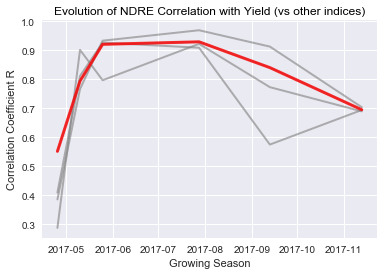

In [204]:
for column in df_corr2.drop('date', axis=1):
   plt.plot(df_corr2['date'], df_corr2[column], marker='', color='grey', linewidth=2, alpha=0.6)
plt.plot(df_corr2['date'], df_corr2['gndvi'], marker='', color='red', linewidth=3, alpha=0.8)

plt.title("Evolution of NDRE Correlation with Yield (vs other indices)", fontsize=12, fontweight=0, color='black')
plt.xlabel("Growing Season")
plt.ylabel("Correlation Coefficient R")
#plt.legend()
#plt.savefig('../readme_resources/img/ndre/ndre_correlation.png', dpi=100)